### Plotter, loader and handler for RNAseq data from other retinal cells in zebrafish

Müller Glia: [Charlton-Perkins, 2019](https://www-ncbi-nlm-nih-gov.ezproxy.nihlibrary.nih.gov/pubmed/30924555)  
> Issues:
>    - in original paper, data aligned to GRCz10 not GRCz11; tried to fix by remapping ENSEMBLIDs in table to GRCz11
>    - Considered downloading original files and remapping but not sure it's worth it
>    - Most photoreceptor genes are present in alternating samples, which could reflect circadian variations or inconsistencies in collection
>    - Decided to modify table to include baseMean (as mean of MG192 samples only), and to de-transform from log2 into linear scale
>    - Also included differential expression analysis for 192hpf in new table
>    - For heatmaps, will accept that inter-sample variability can be ignored and calculate mean to declutter plot (although 48MG1 is consistently weird)
     
Rods: [Sun, 2018](https://www-ncbi-nlm-nih-gov.ezproxy.nihlibrary.nih.gov/pubmed/29422031)
>
> - top50 rod-enriched transcripts are 95% consistent with my RNAseq
> - counts are in log2 CPM


In [1]:
# External libraries
import numpy as np
import pandas as pd
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import importlib
import svgutils
from svgutils.compose import *

from fx_RNAseq import *
def findgene_glia(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/zfMullerGlia_2018Charlton/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "glia8dpf_DEGcounts.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_glia(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/zfMullerGlia_2018Charlton/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "glia8dpf_DEGcounts.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_glia(genename):
    gdf = findgene_glia(genename)
    n = np.arange(1,19) # GFP+
    n = np.append(n, 19.5 + np.arange(1,19)) # GFP-
    h_start = 5
    h_end = 41
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end]
    return n, h

#glia Colors
gC = {
    'm48' : '#c7ffec',
    'm60' : '#94ffdb',
    'm72' : '#57ffc7',
    'm96' : '#2effb9',
    'm120': '#05ffac',
    'm192': '#00d68f',
    
    'c48' : '#e3e3e3',
    'c60' : '#c9c9c9',
    'c72' : '#ababab',
    'c96' : '#969696',
    'c120': '#828282',
    'c192': '#6b6b6b',
    
    'plt' : '',
}

gC['plt']=[
    gC['m48'],gC['m48'],gC['m48'],
    gC['m60'],gC['m60'],gC['m60'],
    gC['m72'],gC['m72'],gC['m72'],
    gC['m96'],gC['m96'],gC['m96'],
    gC['m120'],gC['m120'],gC['m120'],
    gC['m192'],gC['m192'],gC['m192'],
    gC['c48'],gC['c48'],gC['c48'],
    gC['c60'],gC['c60'],gC['c60'],
    gC['c72'],gC['c72'],gC['c72'],
    gC['c96'],gC['c96'],gC['c96'],
    gC['c120'],gC['c120'],gC['c120'],
    gC['c192'],gC['c192'],gC['c192'],
]

def findgene_rods(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/zfRods_Sun2018/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "zfRods.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_rods(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/zfRods_Sun2018/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "zfRods.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_rods(genename):
    gdf = findgene_rods(genename)
    n = np.arange(1,5) # GFP+
    n = np.append(n, 4.5 + np.arange(1,5)) # GFP-
    h_start = 7
    h_end = 15
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#rod Colors
rC = {
    'r' : '#747474',
    'c': '#dac910',
    'plt' : '',
}

rC['plt']=[
    rC['r'],rC['r'],rC['r'],rC['r'],
    rC['c'],rC['c'],rC['c'],rC['c'],
]


def findgene_sqcones(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/sqCones_Kunze/" #directory path
    fPath = "sqConesAwHib_Adult.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_sqcones(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/sqCones_Kunze/" #directory path
    fPath = "sqConesAwHib_Adult.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_sqcones(genename):
    gdf = findgene_sqcones(genename)
    n = np.arange(1,8) # GFP+
    n = np.append(n, 7.5 + np.arange(1,7)) # GFP-
    h_start = 8
    h_end = 21
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#squirrel Colors
sqC = {
    's' : '#4669F2',
    'sHib' : '#548ced',
    'm' : '#04CD22',
    'mHib' : '#53e477',
    'plt' : '',
}

sqC['plt']=[
    sqC['s'],sqC['s'],sqC['s'],sqC['s'],sqC['s'],
    sqC['sHib'],sqC['sHib'],
    sqC['m'],sqC['m'],sqC['m'],
    sqC['mHib'],sqC['mHib'],sqC['mHib'],
]

def findgene_haircell(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/zfHairCells_Mattern2018/" #directory path
    fPath = "zfHairCells_rpkm.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_haircell(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/zfHairCells_Mattern2018/" #directory path
    fPath = "zfHairCells_rpkm.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_haircell(genename):
    gdf = findgene_haircell(genename)
    n = np.arange(1,4) # riboTagged
    n = np.append(n, 3.5 + np.arange(1,4)) # Whatever this is
    h_start = 2
    h_end = 8
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#hairCell Colors
hcC = {
    'h' : '#e147c0',
    'c' : '#dac910',
    'plt' : '',
}

hcC['plt']=[
    hcC['h'],hcC['h'],hcC['h'],
    hcC['c'],hcC['c'],hcC['c'],
]

def findgene_zfLarvalHoang2020(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/zfRet_HoangBlackshaw2020/" #directory path
    fPath = "conesLarval_Hoang.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_zfLarvalHoang2020(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/zfRet_HoangBlackshaw2020/" #directory path
    fPath = "conesLarval_Hoang.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_zfLarvalHoang2020(genename):
    gdf = findgene_zfLarvalHoang2020(genename)
    n = np.arange(1,6) # pct
#     n = np.append(n, 5.5 + np.arange(1,5)) # avg
    h_start = 2
    h_end = 7
#     h_end = 13
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#larval Colors
zflHC = {
    'PRP' : "#dfdac8",
    'eslPR' : '#dacd9a',
    'mslPR' : '#dcc360',
    'lslPR' : '#cca819',
    'adPR' : '#ffd429',
    'lslR' : '#a3a3a3',
    'plt' : '',
}


zflHC['plt']=[
    zflHC['eslPR'],zflHC['mslPR'],
    zflHC['lslPR'],zflHC['adPR'],
    zflHC['lslR']
]

def findgene_zfAdultHoang2020(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/zfRet_HoangBlackshaw2020/" #directory path
    fPath = "photoreceptors_Hoang.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_zfAdultHoang2020(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/zfRet_HoangBlackshaw2020/" #directory path
    fPath = "photoreceptors_Hoang.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_zfAdultHoang2020(genename): #percentExpression
    gdf = findgene_zfAdultHoang2020(genename)
    n = np.arange(1,8) # pct
#     n = np.append(n, 5.5 + np.arange(1,5)) # avg
    h_start = 2
    h_end = 9
#     h_end = 13
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

def plotBars2_zfAdultHoang2020(genename): #averageExpression
    gdf = findgene_zfAdultHoang2020(genename)
    n = np.arange(1,8) # pct
#     n = np.append(n, 5.5 + np.arange(1,5)) # avg
    h_start = 2+8
    h_end = 9+8
#     h_end = 13
    h = gdf.iloc[0,h_start:h_end].values
    return n, h


        
#Hoang Colors
zfaHC = {
    'r' : '#7d7d7d',
    'u' : '#B540B7',
    's' : '#4669F2',
    'm' : '#04CD22',
    'l' : '#CC2C2A',
    'plt' : '',
}

zfaHC['plt']=[
    zfaHC['r'],zfaHC['u'],zfaHC['s'],
    zfaHC['m'],zfaHC['m'],zfaHC['m'],
    zfaHC['l']
]

def findgene_zfOgawa2021(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/zfRet_Ogawa2021/" #directory path
    fPath = "photoreceptors_Ogawa.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_zfOgawa2021(genename):
    dPath = "~/Documents/LiMolec/otherRNAseq/zfRet_Ogawa2021/" #directory path
    fPath = "photoreceptors_Ogawa.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_zfOgawa2021(genename): #averageExpression
    gdf = findgene_zfOgawa2021(genename)
    n = np.arange(1,9) # 
    h_start = 2
    h_end = 10
#     h_end = 13
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

def plotBars2_zfOgawa2021(genename): #percentExpression
    gdf = findgene_zfOgawa2021(genename)
    n = np.arange(1,9) # pct
#     n = np.append(n, 5.5 + np.arange(1,5)) # avg
    h_start = 2+9
    h_end = 9+9
#     h_end = 13
    h = gdf.iloc[0,h_start:h_end].values
    return n, h


#Hoang Colors
zfO = {
    'r' : '#7d7d7d',
    'u' : '#B540B7',
    's' : '#4669F2',
    'm' : '#04CD22',
    'l' : '#CC2C2A',
    'm4': '#cdcd04',
    'onBC': '#ccf2ff',
    'offBC': '#663d00',
    'plt' : '',
}

zfO['plt']=[
    zfO['r'],zfO['u'],zfO['s'],
    zfO['m'],zfO['l'],zfO['m4'],
    zfO['onBC'],zfO['offBC']
]
# df = pd.read_csv("~/Documents/LiMolec/otherRNAseq/zfMullerGlia_2018Charlton/glia8dpf_DEGcounts.csv")

print('LOADED')



LOADED


In [31]:
def formatFigure_zfOgawa2021(genename, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=24)
    fontLabels = font_manager.FontProperties(fname=font_path, size=28)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)

    axH.set_xticks([1,2,3,4,5,6,7,8])
    axH.set_xticklabels(['R','UV','S','M','L','M$_{4}$','B$_{on}$','B$_{off}$']);
#     axH.ticklabel_format(style='sci',axis='y',scilimits=(0,2))
#     axH.set_ylabel('% Exp', fontproperties=fontLabels)
    axH.set_ylabel('Avg. Exp', fontproperties=fontLabels)
    axH.set_title(genename, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
#     axH.set_ylim([0,100])

    for label in (axH.get_xticklabels() + axH.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.tick_params(axis = 'both', which = 'major', labelsize = 24)
    axH.yaxis.offsetText.set_fontsize(24)
    

def heatmap_zfOgawa2021(data, row_labels, col_labels, ax=None,
            cbar_kw={}, **kwargs):

    groupsN = np.array([1,1,1,1,1,1,1,1])
    groupsColors = np.array(['#7d7d7d','#B540B7','#4669F2','#04CD22','#CC2C2A','#cdcd04','#ccf2ff','#663d00'])
    groupsLabels = np.array(['R','UV','S','M','L','M$_{4}$','B$_{on}$','B$_{off}$'])

    im,cbar = heatmap_general(data, row_labels, col_labels, groupsN, groupsColors, groupsLabels, ax=ax, cbarlabel="avg.")

    return im, cbar

In [10]:
gdf = findgenelist_zfOgawa2021('tbx2')
# findgenelist_zfAdultHoang2020('vamp2')
gdf


,Unnamed: 0,avgMean,avgR,avgUV,avgS,avgM,avgL,avgM4/L1,avgonBC,avgoffBC,pctMean,pctR,pctUV,pctS,pctM,pctL,pctM4/L1,pctonBC,pctoffBC
0,tbx20,0.001382,0.000000,0.000000,0.000000,0.005929,0.000000,0.005128,0.000000,0.000000,0.088806,0.000000,0.000000,0.000000,0.197628,0.000000,0.512821,0.000000,0.000000
1,tbx21,0.001126,0.003012,0.000000,0.000000,0.003953,0.002041,0.000000,0.000000,0.000000,0.112568,0.301205,0.000000,0.000000,0.395257,0.204082,0.000000,0.000000,0.000000
2,tbx2a,0.820758,0.156627,5.285714,0.043189,0.055336,0.408163,0.446154,0.088235,0.082645,21.874432,6.626506,87.619048,3.322259,5.138340,28.979592,27.692308,7.352941,8.264463
3,tbx2b,0.785262,0.147590,2.714286,2.710963,0.096838,0.104082,0.082051,0.227941,0.198347,25.361951,9.638554,70.476190,66.112957,9.090909,7.959184,4.615385,17.647059,17.355372


In [16]:
gdf.iloc[:,2+9:10+9]

,pctR,pctUV,pctS,pctM,pctL,pctM4/L1,pctonBC,pctoffBC
0,0.000000,0.000000,0.000000,0.197628,0.000000,0.512821,0.000000,0.000000
1,0.301205,0.000000,0.000000,0.395257,0.204082,0.000000,0.000000,0.000000
2,6.626506,87.619048,3.322259,5.138340,28.979592,27.692308,7.352941,8.264463
3,9.638554,70.476190,66.112957,9.090909,7.959184,4.615385,17.647059,17.355372


In [ ]:
zfhdf = findgenelist_zfXu2020('tbx2a')
zfhdf.iloc[0,2:8]
h

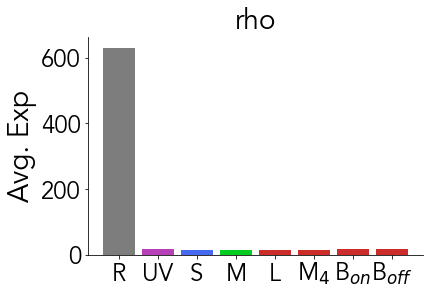

In [38]:
genename = 'rho'
n,h = plotBars_zfOgawa2021(genename)
fH, ax = plt.subplots()
pH = plt.bar(n,h, width=0.8, bottom=None, align='center', data=None, color=zfO['plt'])
formatFigure_zfOgawa2021(genename, fH, ax, pH)


In [ ]:
genename = 'opn1sw2'
n,h = plotBars_zfAdultHoang2020(genename)
fH, ax = plt.subplots()
pH = plt.bar(n,h, width=0.8, bottom=None, align='center', data=None, color=zfaHC['plt'])
formatFigure_zfadultHoang2020(genename, fH, ax, pH)
n,h = plotBars2_zfAdultHoang2020(genename)
fH, ax = plt.subplots()
pH = plt.bar(n,h, width=0.8, bottom=None, align='center', data=None, color=zfaHC['plt'])
formatFigure2_zfadultHoang2020(genename, fH, ax, pH)

In [48]:
zfodf = findgenelist_zfOgawa2021('rho')
zfodf.iloc[0:,2:10]

,avgR,avgUV,avgS,avgM,avgL,avgM4/L1,avgonBC,avgoffBC
0,631.301205,15.876190,13.275748,12.752964,14.136735,14.825641,16.683824,16.520661
1,1.274096,1.590476,2.415282,3.387352,3.502041,3.615385,0.294118,0.314050
2,0.409639,0.609524,0.707641,0.681818,0.659184,0.671795,0.205882,0.198347
3,0.096386,0.485714,0.485050,0.634387,0.812245,0.712821,0.213235,0.206612
4,0.012048,0.009524,0.049834,0.051383,0.044898,0.041026,0.000000,0.008264
5,0.033133,0.057143,0.196013,0.201581,0.451020,0.379487,0.058824,0.123967
6,0.246988,1.400000,1.674419,2.019763,1.604082,1.487179,0.161765,0.289256
7,0.027108,0.066667,0.066445,0.067194,0.026531,0.082051,0.000000,0.024793
8,0.003012,0.028571,0.003322,0.009881,0.008163,0.000000,0.000000,0.008264
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


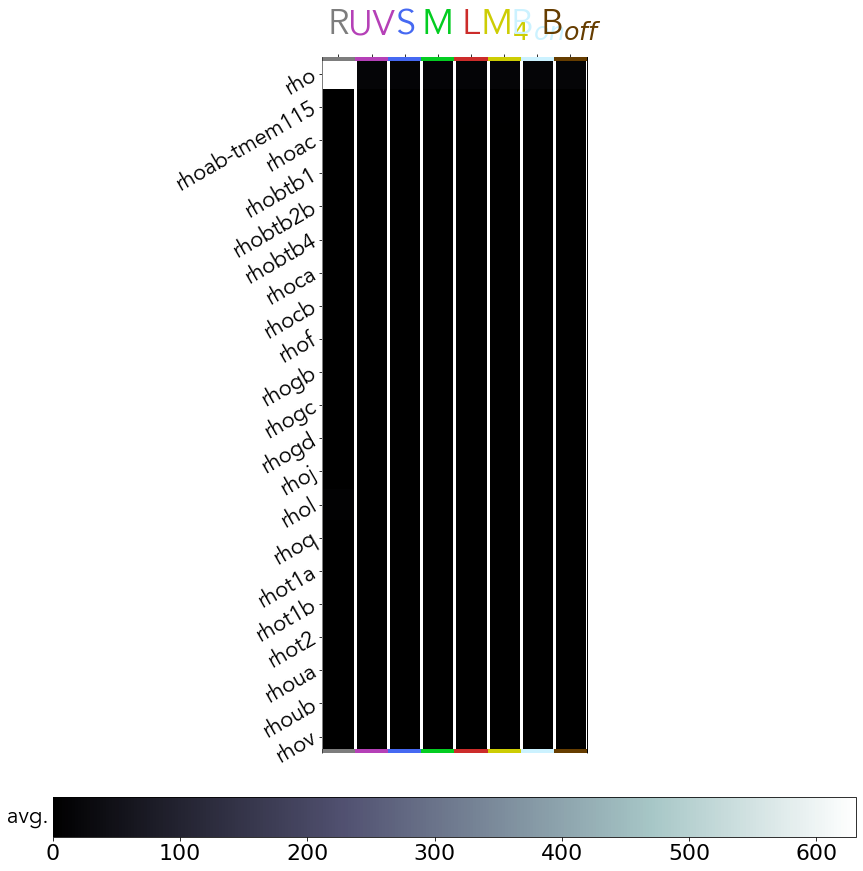

In [49]:
genenameszfo = zfodf['symbol'].values
samplenameszfo = []
datazfo = zfodf.iloc[0:,2:10]
figzfo, axzfo = plt.subplots(figsize=[16,16])
imzfo, cbarzfo = heatmap_zfOgawa2021(datazfo, genenameszfo, samplenameszfo, ax=axzfo)
plt.show()

In [ ]:
gdf = pd.read_csv("~/Documents/LiMolec/otherRNAseq/sqCones_Kunze/" + "temp.txt")
gdf

In [ ]:
gdf = findgenelist_haircell('ntm')
gdf.iloc[0,2:8]
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf

In [ ]:
genename = 'ntm'
n,h = plotBars_haircell(genename)
n

In [ ]:
genename = 'ntm'
n,h = plotBars_haircell(genename)
fH, ax = plt.subplots()
pH = plt.bar(n,h, width=0.8, bottom=None, align='center', data=None, color=hcC['plt'])
formatFigure_haircell(genename, fH, ax, pH)

In [ ]:
gdf = findgenelist_haircell('nrxn')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf[gdf.baseMean > 3]
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([4,24])
# gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf.sort_values(by=["padj"])
gdf

In [ ]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = gdf.iloc[0:,2:8]

# log2matrix = np.vectorize(log2)
# data.iloc[0:,0:] = log2matrix(gdf.iloc[0:,5:41].values)

fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap_haircell(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="tmm")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
gdf = findgenelist_rods('rho')
# gdf = findgenelist_glia('rho')
# gdf = findgene_rods('saga')
gdf
# gdf.iloc[0,7:14]

In [ ]:
genename = 'rho'
n,h = plotBars_rods(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=rC['plt'])
formatFigure_rods(genename, fH, ax, pH)

# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

In [ ]:
genename = 'rho'
n,h = plotBars_glia(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=gC['plt'])

formatFigure_glia(genename, fH, ax, pH)

In [ ]:
# gdf = findgenelist('aldh1')
gdf = findgenelist_rods('ankrd33')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf[gdf.baseMean > 3]
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([4,24])
# gdf = gdf.sort_values(by=["symbol"])
gdf = gdf.sort_values(by=["padj"])

gdf

In [ ]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = gdf.iloc[0:,5:41]

# log2matrix = np.vectorize(log2)
# data.iloc[0:,0:] = log2matrix(gdf.iloc[0:,5:41].values)

fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap_glia(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="tmm")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
log2matrix(gdf.iloc[0:,5:41].values)

In [ ]:
# gdf = findgenelist('aldh1')
gdf = findgenelist_rods('elovl')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf[gdf.baseMean > 3]
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([4,24])
gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf.sort_values(by=["padj"])
gdf

In [ ]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = gdf.iloc[0:,7:16]

# log2matrix = np.vectorize(log2)
# data.iloc[0:,0:] = log2matrix(gdf.iloc[0:,5:41].values)

fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap_rods(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="fpkm")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

### Script to create modified table with DEG analysis from 192hpf and baseMean using only MG192 samples

In [ ]:
# df_tmm = pd.read_csv("~/Documents/LiMolec/otherRNAseq/zfMullerGlia_2018Charlton/glia_23615_sup-0006-tables2.csv")
# # get rid of non-existing symbols
# df_tmm.symbol.fillna(df_tmm['symbol_g10'], inplace=True)
# df_tmm.symbol.fillna(df_tmm['ensemblID'], inplace=True)

# df_deg = pd.read_csv("~/Documents/LiMolec/otherRNAseq/zfMullerGlia_2018Charlton/Table1_192hpf.csv")
# # sort DEG frame
# df_deg = df_deg.set_index('ensemblID')
# df_deg = df_deg.reindex(index=df_tmm['ensemblID'])
# df_deg = df_deg.reset_index()


# df = df_tmm.copy()

# df.drop(columns=['ensemblID', 'symbol_g10','GOid'], inplace=True)
# df['log2FoldChange'] = df_deg['logFC']
# df['baseMean'] = np.power(2,df_deg['logCPM'])
# df['padj'] = df_deg['PValue']

# df = df[['symbol', 'genename', 'log2FoldChange','baseMean', 'padj', 
#            '48MG1', '48MG2', '48MG3', '60MG1', '60MG2', '60MG3', '72MG1',
#            '72MG2', '72MG3', '96MG1', '96MG2', '96MG3', '120MG1', '120MG2',
#            '120MG3', '192MG1', '192MG2', '192MG3', '48C1', '48C2', '48C3', '60C1',
#            '60C2', '60C3', '72C1', '72C2', '72C3', '96C1', '96C2', '96C3', '120C1',
#            '120C2', '120C3', '192C1', '192C2', '192C3', 
#           ]]
# df.iloc[:,5:] = np.power(2,df.iloc[:,5:])
# df.to_csv('~/Documents/LiMolec/otherRNAseq/zfMullerGlia_2018Charlton/glia8dpf_DEGcounts.csv', index=False)
# df.head()


### Script to create modified table for hair cell riboTAG data from zf 5 dpf (Mattern, 2018)

In [ ]:
# df_hc = pd.read_csv("~/Documents/LiMolec/otherRNAseq/zfHairCells_Mattern2018/zfHairCells_rpkm.csv")
# df_hc.symbol.fillna(df_hc['ensemblID'], inplace=True)
# df_hc
# df_hc.to_csv('~/Documents/LiMolec/otherRNAseq/zfHairCells_Mattern2018/zfHairCells_rpkm.csv', index=False)


### Script to create modified table with DEG analysis for microglia dataset (Mitchell, 2018)